In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [17]:
n_samples = 1500

X_data, y_labels = make_blobs(n_samples=n_samples)

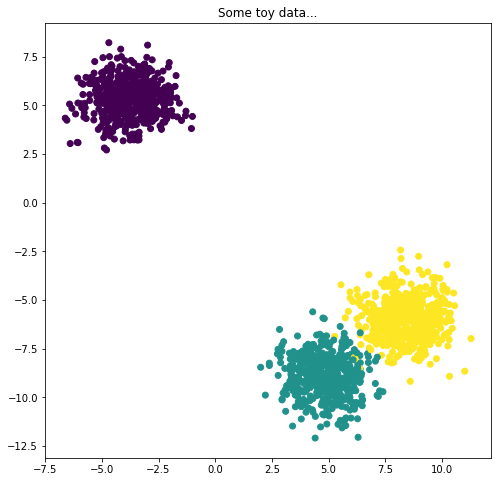

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_labels)
plt.title("Some toy data...")
plt.show()

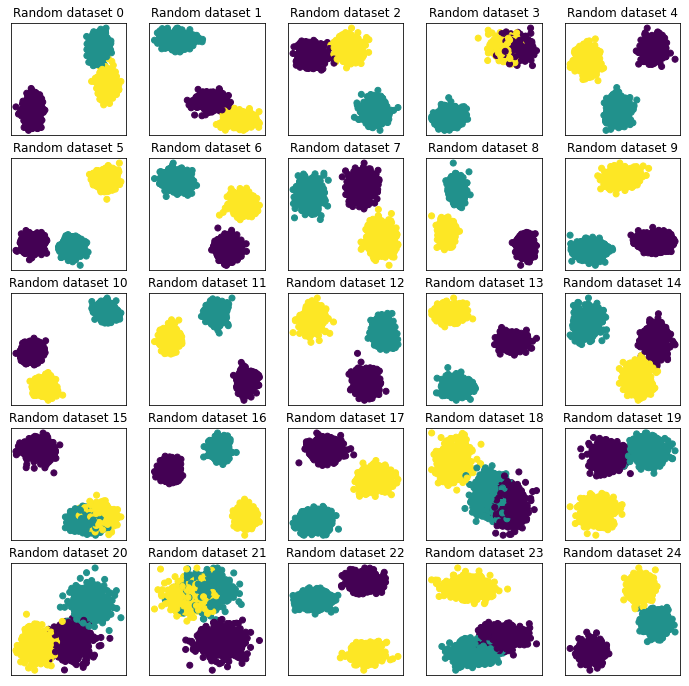

In [42]:
plt.figure(figsize=(12, 12))

n_samples = 1500
gallery_width = 5
gallery_height = 5

for i in range(gallery_width*gallery_height):
    # Generate some data
    X_data, y_labels = make_blobs(n_samples=n_samples)
    
    # Visualise the data (in a sub-plot)
    plt.subplot(gallery_height,gallery_width,i+1)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_labels)
    plt.title(f"Random dataset {i}")
    plt.xticks([])
    plt.yticks([])
    
plt.show()

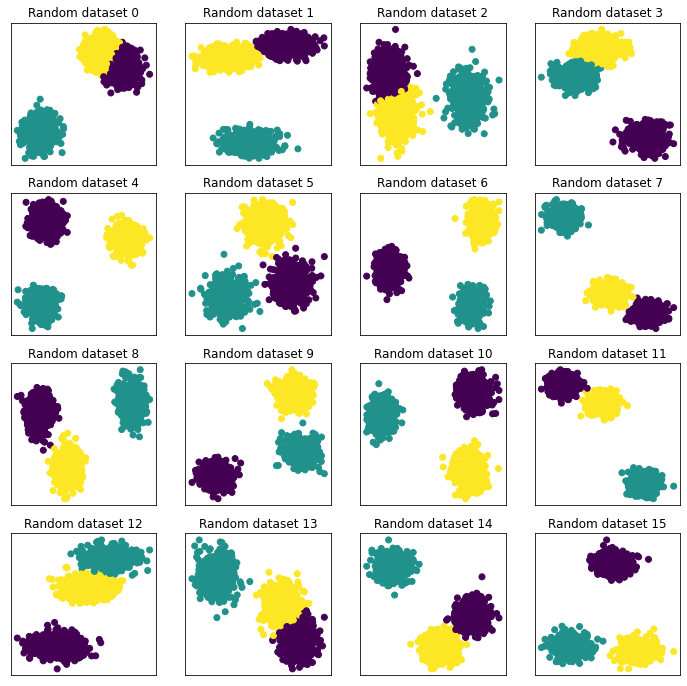

In [47]:
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 12))

n_samples = 1500
gallery_width = 4
gallery_height = 4

for i in range(gallery_width*gallery_height):
    # Generate some data
    X_data, y_labels = make_blobs(n_samples=n_samples)
    
    # !!! PERFORM CLUSTER ANALYSIS !!!
    y_predicted = KMeans(n_clusters=3).fit_predict(X_data)
    
    # Visualise the unlabelled data and the *predicted* labels
    plt.subplot(gallery_height,gallery_width,i+1)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_predicted)
    plt.title(f"Random dataset {i}")
    plt.xticks([])
    plt.yticks([])

plt.show()

In [57]:
import pandas as pd
df = pd.read_csv('../data/Shoe Sales Clusters.csv')
df.head()
print(df)

      Transaction  CustID      Type  Spent
0               1     210    Sandal     29
1               2       7      Work     74
2               3     220     Dress    134
3               4      93  Athletic    150
4               5      66  Athletic    168
...           ...     ...       ...    ...
2995         2996     204  Athletic    360
2996         2997      53  Athletic     67
2997         2998     136    Casual     27
2998         2999     173      Work     85
2999         3000     141      Work    276

[3000 rows x 4 columns]


In [58]:
df = pd.get_dummies(df, columns=['Type'])
df.head()

,Transaction,CustID,Spent,Type_Athletic,Type_Casual,Type_Dress,Type_Sandal,Type_Work
0,1,210,29,0,0,0,1,0
1,2,7,74,0,0,0,0,1
2,3,220,134,0,0,1,0,0
3,4,93,150,1,0,0,0,0
4,5,66,168,1,0,0,0,0


In [60]:
pivot = df.pivot_table(index=['CustID'], values=['Type_Athletic','Type_Casual','Type_Dress','Type_Sandal','Type_Work'], aggfunc='sum')
print(pivot)

        Type_Athletic  Type_Casual  Type_Dress  Type_Sandal  Type_Work
CustID                                                                
1                  10            2           2            1          1
2                   0            7           1            3          1
3                   0            1           9            0          0
4                   9            5           0            0          0
5                   9            2           0            1          2
...               ...          ...         ...          ...        ...
246                 0            5           2            1          2
247                 1            2           2            2          4
248                 0            4           4            3          0
249                 1            7           0            5          0
250                 1            5           0            0          8

[250 rows x 5 columns]


In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=4)
kmeans.fit(pivot)

pivot['cluster'] = kmeans.labels_
pivot.head()

,Type_Athletic,Type_Casual,Type_Dress,Type_Sandal,Type_Work,cluster
CustID,,,,,,
1,10,2,2,1,1,3
2,0,7,1,3,1,1
3,0,1,9,0,0,2
4,9,5,0,0,0,3
5,9,2,0,1,2,3


In [62]:
pivot_cluster = pivot.pivot_table(index=['cluster'], values=['Type_Athletic','Type_Casual','Type_Dress','Type_Sandal','Type_Work'], aggfunc='sum')
print(pivot_cluster)

         Type_Athletic  Type_Casual  Type_Dress  Type_Sandal  Type_Work
cluster                                                                
0                 30.0        205.0        68.0           40      419.0
1                 41.0        314.0        75.0          234       49.0
2                 48.0        188.0       476.0          168       46.0
3                368.0        125.0        43.0           33       30.0


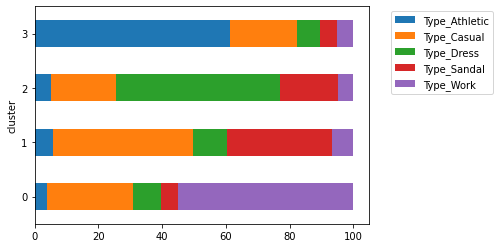

In [63]:
import matplotlib.pyplot as plt
plot_cluster_percentage = pivot_cluster.div(pivot_cluster.sum(axis=1), axis=0)*100
plot_cluster_percentage
plot_cluster_percentage.plot(kind='barh', stacked=True)
plt.legend(plot_cluster_percentage, bbox_to_anchor=(1.05,1))